- Biomarker
    - HER2 Overexpression
- Drugs
    - Trastuzumab (Herceptin)
    - Pertuzumab
    - Lapatinib
- Tissue
    - Breast

- Drug Information
    - Ado-trastuzumab emtansine is a HER2-antibody drug conjugate which incorporates the HER2 targeted actions of trastuzumab with the microtubule inhibitor DM1 (a maytansine derivative). The conjugate, which is linked via a stable thioether linker, allows for selective delivery into HER2 overexpressing cells, resulting in cell cycle arrest and apoptosis.	
    - The epitope for pertuzumab is the domain of HER2 where it binds to HER3, and pertuzumab prevents the HER2/HER3 dimer from forming, which blocks signalling by the dimer. Trastuzumab is another monoclonal antibody against HER2; its epitope is the domain where HER2 binds to another HER2 protein. The two mAbs together prevent HER2 from functioning.	
    - Lapatinib is a dual TKI of EGFR and HER2 by reversibly binding to tyrosine kinase, blocking phosphorylation and activation of downstream second messengers (Erk1/2 and Akt), regulating cellular proliferation and survival in EGFR- and HER2-expressing tumors.	
    
- Pathway Information
    - Breast cancer is the leading cause of cancer death among women worldwide. The vast majority of breast cancers are carcinomas that originate from cells lining the milk-forming ducts of the mammary gland. The molecular subtypes of breast cancer, which are based on the presence or absence of hormone receptors (estrogen and progesterone subtypes) and human epidermal growth factor receptor-2 (HER2), include: 
        - hormone receptor positive and HER2 negative (luminal A subtype),
        - **hormone receptor positive and HER2 positive (luminal B subtype),**
        - **hormone receptor negative and HER2 positive (HER2 positive),**
        - hormone receptor negative and HER2 negative (basal-like or triple-negative breast cancers (TNBCs)).
    - Hormone receptor positive breast cancers are largely driven by the estrogen/ER pathway. In HER2 positive breast tumours, HER2 activates the PI3K/AKT and the RAS/RAF/MAPK pathways, and stimulate cell growth, survival and differentiation. In patients suffering from TNBC, the deregulation of various signalling pathways (Notch and Wnt/beta-catenin), EGFR protein have been confirmed. In the case of breast cancer only 8% of all cancers are hereditary, a phenomenon linked to genetic changes in BRCA1 or BRCA2. **Somatic mutations in only three genes (TP53, PIK3CA and GATA3) occurred at >10% incidence across all breast cancers.**

- Exploratory
    - HER2 Overexpression is seen in 20% of new breast cancer patients (Esserman LJ and Joe BN. Clinical features, diagnosis, and staging of newly diagnosed breast cancer, in Up-to-Date (Burstein H, Vora SR, eds.). Up-to-Date, 2017.)


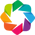

In [1]:
import pandas as pd
import numpy as np

import rnaseq_lib as r

import holoviews as hv
hv.extension('bokeh')

## Inputs

In [2]:
df_path = '/mnt/rnaseq-cancer/Objects/tcga-gtex-metadata-expression.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0, dtype=r.tissues.dtype)

Genes of interest

In [3]:
genes = ['ERBB2', 'ESR1', 'ESR2', 'PGR']

Create plot object

In [4]:
h = r.plot.Holoview(df)

# Comparative Expression

In [131]:
%%opts BoxWhisker [width=900 xrotation=45]
plots = {g: h.gene_distribution(g) for g in genes}
hv.NdLayout(plots).cols(1)

:NdLayout   [Default]
   :BoxWhisker   [tissue,dataset]   (gene)

## Compare HER2 and ER Pathway Genes

Create subset

In [132]:
sub = df[h.df_cols].copy()
sub[genes] = df[genes].apply(lambda x: np.log2(x+1))

ERBB2 and ESR1

In [134]:
%%opts Scatter [color_index='tissue' width=800 height=500 legend_position='left' tools=['hover']]
%%opts Scatter (cmap='tab20')
hv.Scatter(data=sub, kdims=['ERBB2'], 
           vdims=['ESR1', 'tissue', 'dataset', 'tumor', 'id'])

:Scatter   [ERBB2]   (ESR1,tissue,dataset,tumor,id)

Subset for just Breast samples

In [135]:
%%opts Scatter [color_index='tumor' width=800 height=500 legend_position='left' tools=['hover']]
%%opts Scatter (cmap='Set1_r')
hv.Scatter(data=sub[sub.tissue == 'Breast'], kdims=['ERBB2'], 
           vdims=['ESR1', 'tissue', 'dataset', 'tumor', 'id'], 
           label='ESR1/ERBB2 Expression in Breast Cancer (red=Tumor / grey=normal)')

:Scatter   [ERBB2]   (ESR1,tissue,dataset,tumor,id)

In [9]:
h._gene_cutoff(gene='ERBB2', tissue='Breast', percent=0.3)

{'gtex': 11.797598544680696,
 'normal': 13.671921444110851,
 'tumor': 14.362259743056454}

## Grid Matrix of Genes

In [125]:
%%opts NdOverlay [height=200 width=200]
from holoviews.operation import gridmatrix
ds = hv.Dataset(sub[sub.tissue=='Breast'])
grouped_by_species = ds.groupby('tumor', container_type=hv.NdOverlay)
gridmatrix(grouped_by_species)

:GridMatrix   [X,Y]
   :NdOverlay   [tumor]
      :Histogram   [PGR]   (PGR_frequency)

## Differential Expression

In [12]:
%%opts Scatter [color_index='Tissue' legend_position='left' width=700 height=500 tools=['hover']] 
%%opts Scatter (cmap='tab20' size=10 alpha=0.5)
h.gene_DE('ERBB2', extents=(8, -1, 15, 3))

:Scatter   [Expression]   (L2FC,Tissue)